# Easy

## 5E1

**A:** (2) and (4)

## 5E2

$$ \mu_{i} = \alpha + \beta_{L}L_{i} + \beta_{P}P_{i}$$

## 5E3

$$ \mu_{i} = \alpha + \beta_{F}F_{i} + \beta_{L}L_{i}$$

The important thing here to note is that Funding (F) and size of Lab (L) are correlated with each other. If their correlation is negative then they both affect the result positively. If their relation is positive, they should be on the opposite side of zero. The question actually leaves open which is the case here...

## 5E4

**A:** (1), (3), (4) and (5) are inferentially equivalent. (2) stands out because of the redundant parameter a.

# Medium

## 5M1

In [93]:
from scipy.stats import norm
import pandas as pd
import seaborn as sns
%matplotlib inline

n = 100
x_real = norm(0,1).rvs(100)
x_spurr = norm.rvs(x_real, 0.8)
y = norm.rvs(x_real)
d = pd.DataFrame({
   "y": y,
    "x_real": x_real,
    "x_spurr": x_spurr
    
})

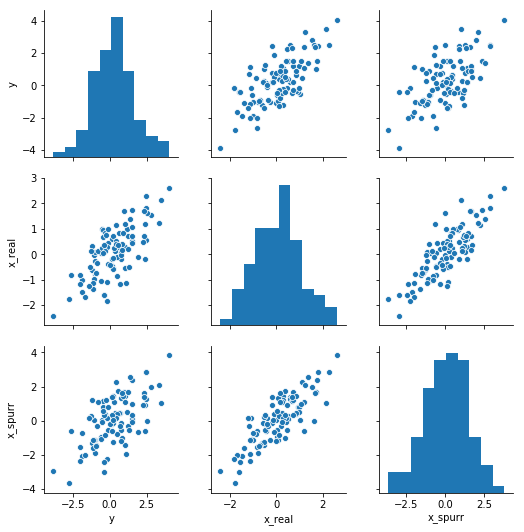

In [94]:
sns.pairplot(d);

In [95]:
import pymc3 as pm

with pm.Model() as m_5m1:
    sigma = pm.HalfNormal('sigma', sd=1)
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta_r = pm.Normal('beta_r', mu=0, sd=5)
    beta_s = pm.Normal('beta_s', mu=0, sd=5)
    mu = alpha + beta_r*d.x_real + beta_s*d.x_spurr
    y = pm.Normal('y', mu, sigma, observed=d.y)
    
    trace_5m1 = pm.sample()

pm.summary(trace_5m1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_s, beta_r, alpha, sigma]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:01<00:00, 2649.71draws/s]
The acceptance probability does not match the target. It is 0.8806738125887917, but should be close to 0.8. Try to increase the number of tuning steps.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,0.192585,0.097489,0.002349,-0.001609,0.374618,1854.166681,0.999894
beta_r,0.898451,0.176015,0.004037,0.567430,1.245693,1553.993294,0.999914
beta_s,0.113279,0.125361,0.002962,-0.118838,0.364132,1515.769554,1.000952
sigma,0.995394,0.070697,0.001600,0.866727,1.138749,1602.505660,1.000027


In [96]:
# How does it look if we model bivariate  relationships?
# For simplicity with glms

from sklearn.linear_model import LinearRegression

glm_real = LinearRegression().fit(d["x_real"].values.reshape(-1,1), d['y'])
glm_real.intercept_, glm_real.coef_

(0.19034949012965155, array([1.03170567]))

In [97]:
glm_real = LinearRegression().fit(d["x_spurr"].values.reshape(-1,1), d['y'])
glm_real.intercept_, glm_real.coef_

(0.22277860608188949, array([0.63730746]))

In [98]:
glm_real = LinearRegression().fit(d.drop("y", axis=1), d['y'])
glm_real.intercept_, glm_real.coef_

(0.1923641849490359, array([0.90078851, 0.11206404]))

**A:** As we can see the spurious correlation is discovered when using both variables as predictors.

## 5M2